In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import NullFormatter
import glob
import time
import math
import numba
import sys

import random


nframes=20000

In [2]:


speckles=np.ndarray(shape=(nframes,100,100))

#Paint speckles

for i in range(speckles.shape[0]):
    speckles[i,:,:]=0
    speckle_x=random.randrange(100)
    speckle_y=random.randrange(100)
    speckles[i,speckle_x:speckle_x+1,speckle_y:speckle_y+1]=50
    
    
speckles_with_mask=np.copy(speckles)



#Cut out the mask


for i in range(speckles_with_mask.shape[0]):
    speckles_with_mask[i,35:65,35:65]=0
    


    









In [3]:
@numba.njit(parallel=True)
def ghostPixel():
    
    ghost=np.zeros(shape=(100,100),dtype=np.double)
    

    
    
    
    #buckets = frames[:,s1x1:s1x2,s1y1:s1y2].sum(axis=(1,2))
    
    buckets=[]
    
    for i in range(nframes):
        buckets.append(np.sum(speckles_with_mask[i,:,:]))
    
    
    for i in numba.prange(100):
        for j in numba.prange(100):
            term1=0
            term2=0
            term3=0
            #This loop goes over 10000 frames
            for frame_ct in numba.prange(nframes):

                #This is I_i
                beam1_bucket=np.double(buckets[frame_ct])

                #This is S_i
                beam2_pixel=np.double(speckles[frame_ct,i,j])
                #Where i is the index of a frame (frame_ct in code)
                #Note that this 'i' is not the same as  the 'i' in the first for-loop above. This 'i' is the x coordinate of the image



                term1+=beam1_bucket*beam2_pixel
                term2+=beam1_bucket
                term3+=beam2_pixel




            #After the three summations have been assembled, put them into formula (3) to produce the ghost image at the [i,j] coordinate 
            ghost[i,j]=term1/nframes-(term2*term3)/ (nframes ** 2)
    return ghost






In [4]:
test=ghostPixel()

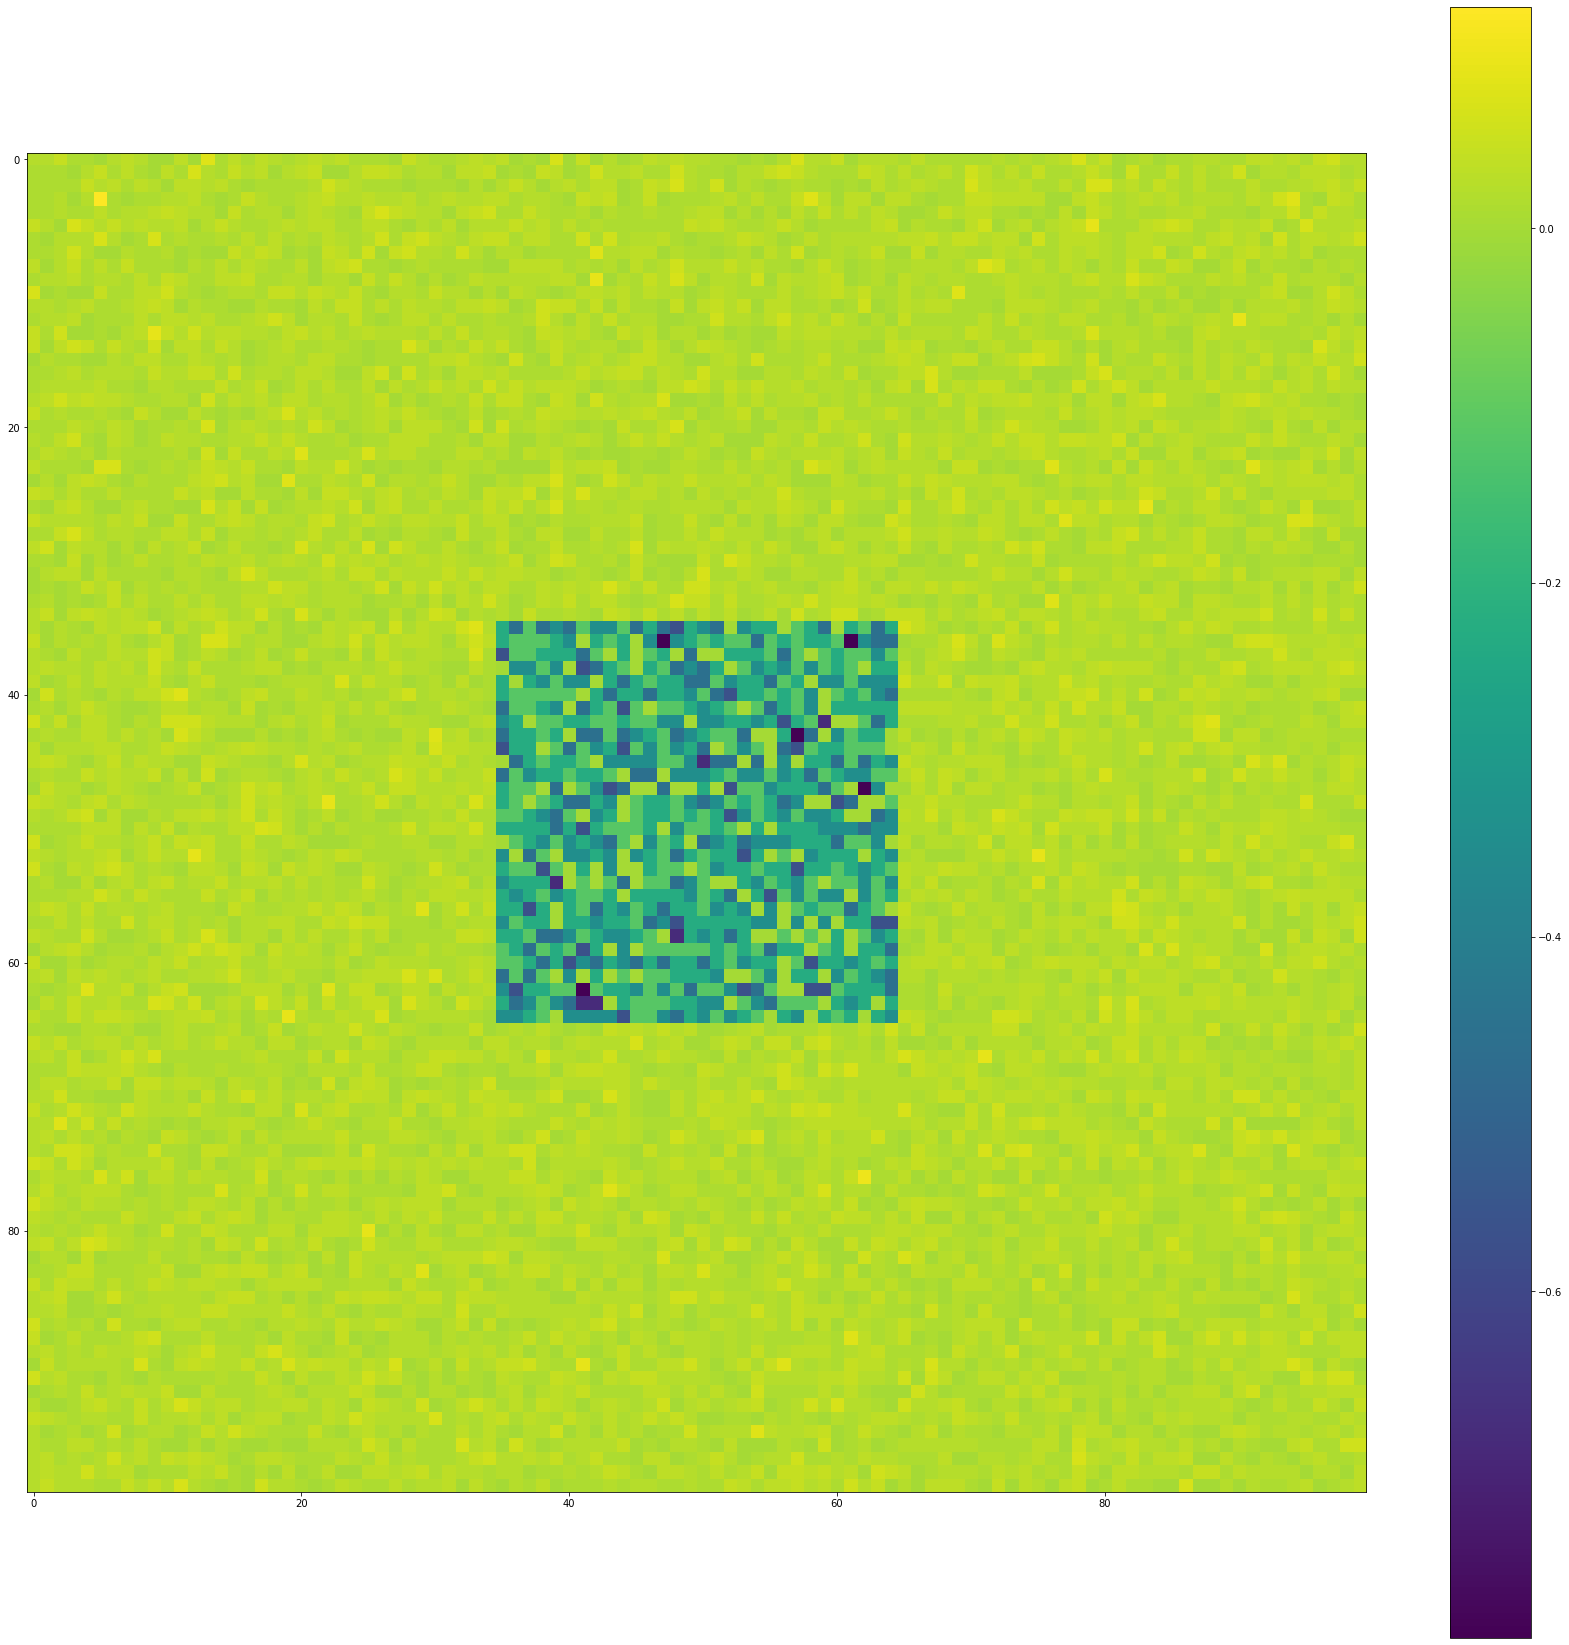

In [5]:
#Show the ghost
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(30, 30))
_=ax.imshow(test)
fig.colorbar(_)


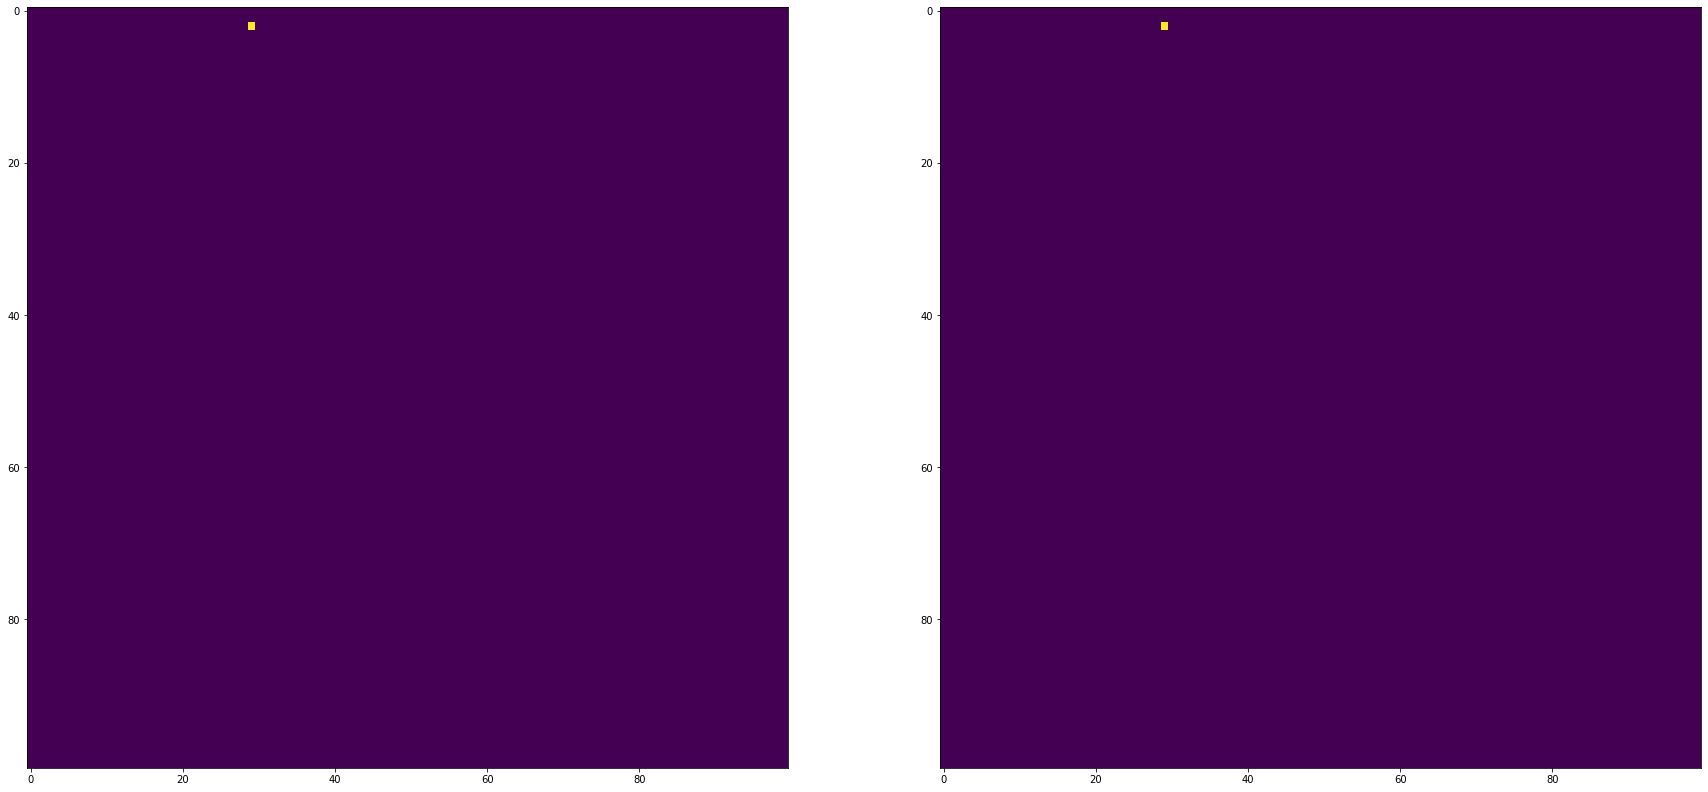

In [6]:
fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(30, 30))
frame_index=random.randrange(nframes)
_=ax[0].imshow(speckles[frame_index,:,:])
_=ax[1].imshow(speckles_with_mask[frame_index,:,:])